# Data analysis

## Basic statistics

In [34]:
import pandas as pd
import seaborn as sns

In [35]:
df = pd.read_csv('../data/npf_train.csv', index_col='id')

In [36]:
df.head()

,date,class4,partlybad,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
id,,,,,,,,,,,,,,,,,,,,,
1,2000-02-23,nonevent,False,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,380.296466,...,-10.730843,1.381815,-10.282754,1.870056,8.356761,4.534937,0.178084,0.123402,0.002546,0.000686
2,2000-03-25,Ib,False,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
3,2000-04-06,Ib,False,372.363293,0.626329,372.245689,0.615803,372.847246,0.647279,372.193952,...,0.991521,1.914186,1.846503,1.954748,14.286261,9.572444,0.418313,0.344386,0.000541,0.000072
4,2000-04-11,nonevent,False,381.437442,7.281159,381.380405,7.236002,381.926532,7.294374,381.381156,...,1.753414,0.340565,2.524931,0.414255,4.945162,3.405652,0.224159,0.192014,0.003710,0.001209
5,2000-04-23,II,False,375.426310,3.264246,375.436524,3.110886,375.740215,3.274924,375.337059,...,10.940107,2.179821,11.441893,3.048699,13.087014,9.771415,0.525591,0.476821,0.003680,0.002160


In [37]:
class2 = df['class4'].copy()
class2[class2 != 'nonevent'] = 'event'
df['class2'] = class2

df.drop(['date', 'partlybad'], axis=1, inplace=True)

In [38]:
df['class4'], mapping_class4 = df['class4'].astype('category').factorize()
df['class2'], mapping_class2 = df['class2'].astype('category').factorize()

In [39]:
df.head()

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
id,,,,,,,,,,,,,,,,,,,,,
1,0,380.528120,0.802001,380.371466,0.889550,381.816207,1.292593,380.296466,0.968884,236.605353,...,1.381815,-10.282754,1.870056,8.356761,4.534937,0.178084,0.123402,0.002546,0.000686,0
2,1,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,252.480327,...,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210,1
3,1,372.363293,0.626329,372.245689,0.615803,372.847246,0.647279,372.193952,0.596289,269.981547,...,1.914186,1.846503,1.954748,14.286261,9.572444,0.418313,0.344386,0.000541,0.000072,1
4,0,381.437442,7.281159,381.380405,7.236002,381.926532,7.294374,381.381156,7.208287,68.364653,...,0.340565,2.524931,0.414255,4.945162,3.405652,0.224159,0.192014,0.003710,0.001209,0
5,2,375.426310,3.264246,375.436524,3.110886,375.740215,3.274924,375.337059,2.903780,242.192619,...,2.179821,11.441893,3.048699,13.087014,9.771415,0.525591,0.476821,0.003680,0.002160,1


In [40]:
df.describe()

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,0.867442,381.368963,3.259636,381.384253,3.072758,382.355206,4.195168,381.273799,2.868651,196.704452,...,1.645055,6.602589,1.987108,11.105194,7.854483,0.458112,0.394200,0.003137,0.000702,0.500000
std,0.986440,11.155961,3.023836,11.095356,2.809890,10.833336,4.284315,11.064724,2.568889,129.509968,...,1.005215,10.144466,1.205222,6.832233,5.151395,0.330633,0.299171,0.002211,0.000678,0.500582
min,0.000000,360.468984,0.164474,360.444929,0.149242,361.779070,0.152663,360.010857,0.134230,3.719434,...,0.033329,-24.874583,0.031017,0.295780,0.174813,0.005346,0.003226,0.000227,0.000023,0.000000
25%,0.000000,373.172325,0.887424,373.254653,0.895456,374.531123,1.153497,373.310239,0.890562,74.046336,...,0.791984,-1.050160,0.872620,4.898369,2.802729,0.146704,0.100064,0.001601,0.000290,0.000000
50%,0.500000,380.514806,2.281776,380.528337,2.187893,381.358997,2.671528,380.452108,2.073500,200.061835,...,1.660455,8.264583,2.006074,11.886223,8.266491,0.434569,0.373912,0.002561,0.000514,0.500000
75%,2.000000,388.206308,4.605244,388.209330,4.272945,388.692527,6.154840,388.163864,4.082635,313.596897,...,2.428618,14.621255,2.935275,17.204665,12.498510,0.723246,0.628708,0.004042,0.000871,1.000000
max,3.000000,421.511176,17.284759,421.057843,15.955499,422.627800,40.366704,419.924510,14.342423,425.991101,...,5.124718,25.215417,5.422549,22.560576,16.830501,1.242857,1.074115,0.015837,0.005078,1.000000


In [41]:
df.dtypes

class4           int64
CO2168.mean    float64
CO2168.std     float64
CO2336.mean    float64
CO2336.std     float64
                ...   
UV_B.mean      float64
UV_B.std       float64
CS.mean        float64
CS.std         float64
class2           int64
Length: 102, dtype: object

In [42]:
df.columns

Index(['class4', 'CO2168.mean', 'CO2168.std', 'CO2336.mean', 'CO2336.std',
       'CO242.mean', 'CO242.std', 'CO2504.mean', 'CO2504.std', 'Glob.mean',
       ...
       'T672.std', 'T84.mean', 'T84.std', 'UV_A.mean', 'UV_A.std', 'UV_B.mean',
       'UV_B.std', 'CS.mean', 'CS.std', 'class2'],
      dtype='object', length=102)

## Save cleaned dataframe

In [43]:
df.to_csv('../data/train_data.csv', index=False)

## Correlation of standard deviation columns

In [28]:
df_stds = df.loc[:, df.columns[range(2, df.shape[1], 2)]]
df_stds.corr()

,CO2168.std,CO2336.std,CO242.std,CO2504.std,Glob.std,H2O168.std,H2O336.std,H2O42.std,H2O504.std,H2O672.std,...,SO2168.std,SWS.std,T168.std,T42.std,T504.std,T672.std,T84.std,UV_A.std,UV_B.std,CS.std
CO2168.std,1.000000,0.993389,0.900384,0.978829,0.382078,0.522732,0.523087,0.536171,0.531161,0.534905,...,-0.012933,0.104514,0.271731,0.280499,0.252961,0.248533,0.282120,0.421507,0.492944,0.326825
CO2336.std,0.993389,1.000000,0.874156,0.993028,0.377130,0.518532,0.518704,0.530453,0.525714,0.528942,...,-0.011093,0.109104,0.270696,0.274094,0.257880,0.254160,0.278199,0.415647,0.487943,0.335386
CO242.std,0.900384,0.874156,1.000000,0.841591,0.373041,0.487353,0.485090,0.512366,0.494149,0.497027,...,-0.022095,0.050417,0.251552,0.282111,0.224536,0.216667,0.275436,0.414289,0.491044,0.268022
CO2504.std,0.978829,0.993028,0.841591,1.000000,0.374578,0.521767,0.521303,0.531679,0.526559,0.529424,...,-0.011329,0.118119,0.264291,0.264880,0.255489,0.254951,0.270641,0.412523,0.483850,0.346976
Glob.std,0.382078,0.377130,0.373041,0.374578,1.000000,0.535283,0.542195,0.531128,0.543401,0.538396,...,-0.022714,-0.221730,0.787780,0.816130,0.775449,0.775941,0.809140,0.987889,0.942940,0.231690
H2O168.std,0.522732,0.518532,0.487353,0.521767,0.535283,1.000000,0.996736,0.992804,0.990969,0.985259,...,-0.059437,0.189565,0.431217,0.443811,0.414590,0.413607,0.445270,0.565569,0.607247,0.379917
H2O336.std,0.523087,0.518704,0.485090,0.521303,0.542195,0.996736,1.000000,0.984727,0.997572,0.993458,...,-0.065981,0.177036,0.434105,0.445882,0.420015,0.420001,0.447787,0.572535,0.614704,0.369949
H2O42.std,0.536171,0.530453,0.512366,0.531679,0.531128,0.992804,0.984727,1.000000,0.977276,0.970902,...,-0.051437,0.204116,0.429642,0.446770,0.408567,0.405848,0.445980,0.561599,0.603777,0.392872
H2O504.std,0.531161,0.525714,0.494149,0.526559,0.543401,0.990969,0.997572,0.977276,1.000000,0.997778,...,-0.070301,0.174482,0.430905,0.442261,0.417851,0.418371,0.444290,0.574456,0.617443,0.364640
H2O672.std,0.534905,0.528942,0.497027,0.529424,0.538396,0.985259,0.993458,0.970902,0.997778,1.000000,...,-0.073398,0.179576,0.423583,0.435425,0.410175,0.411480,0.437112,0.569707,0.613571,0.360257


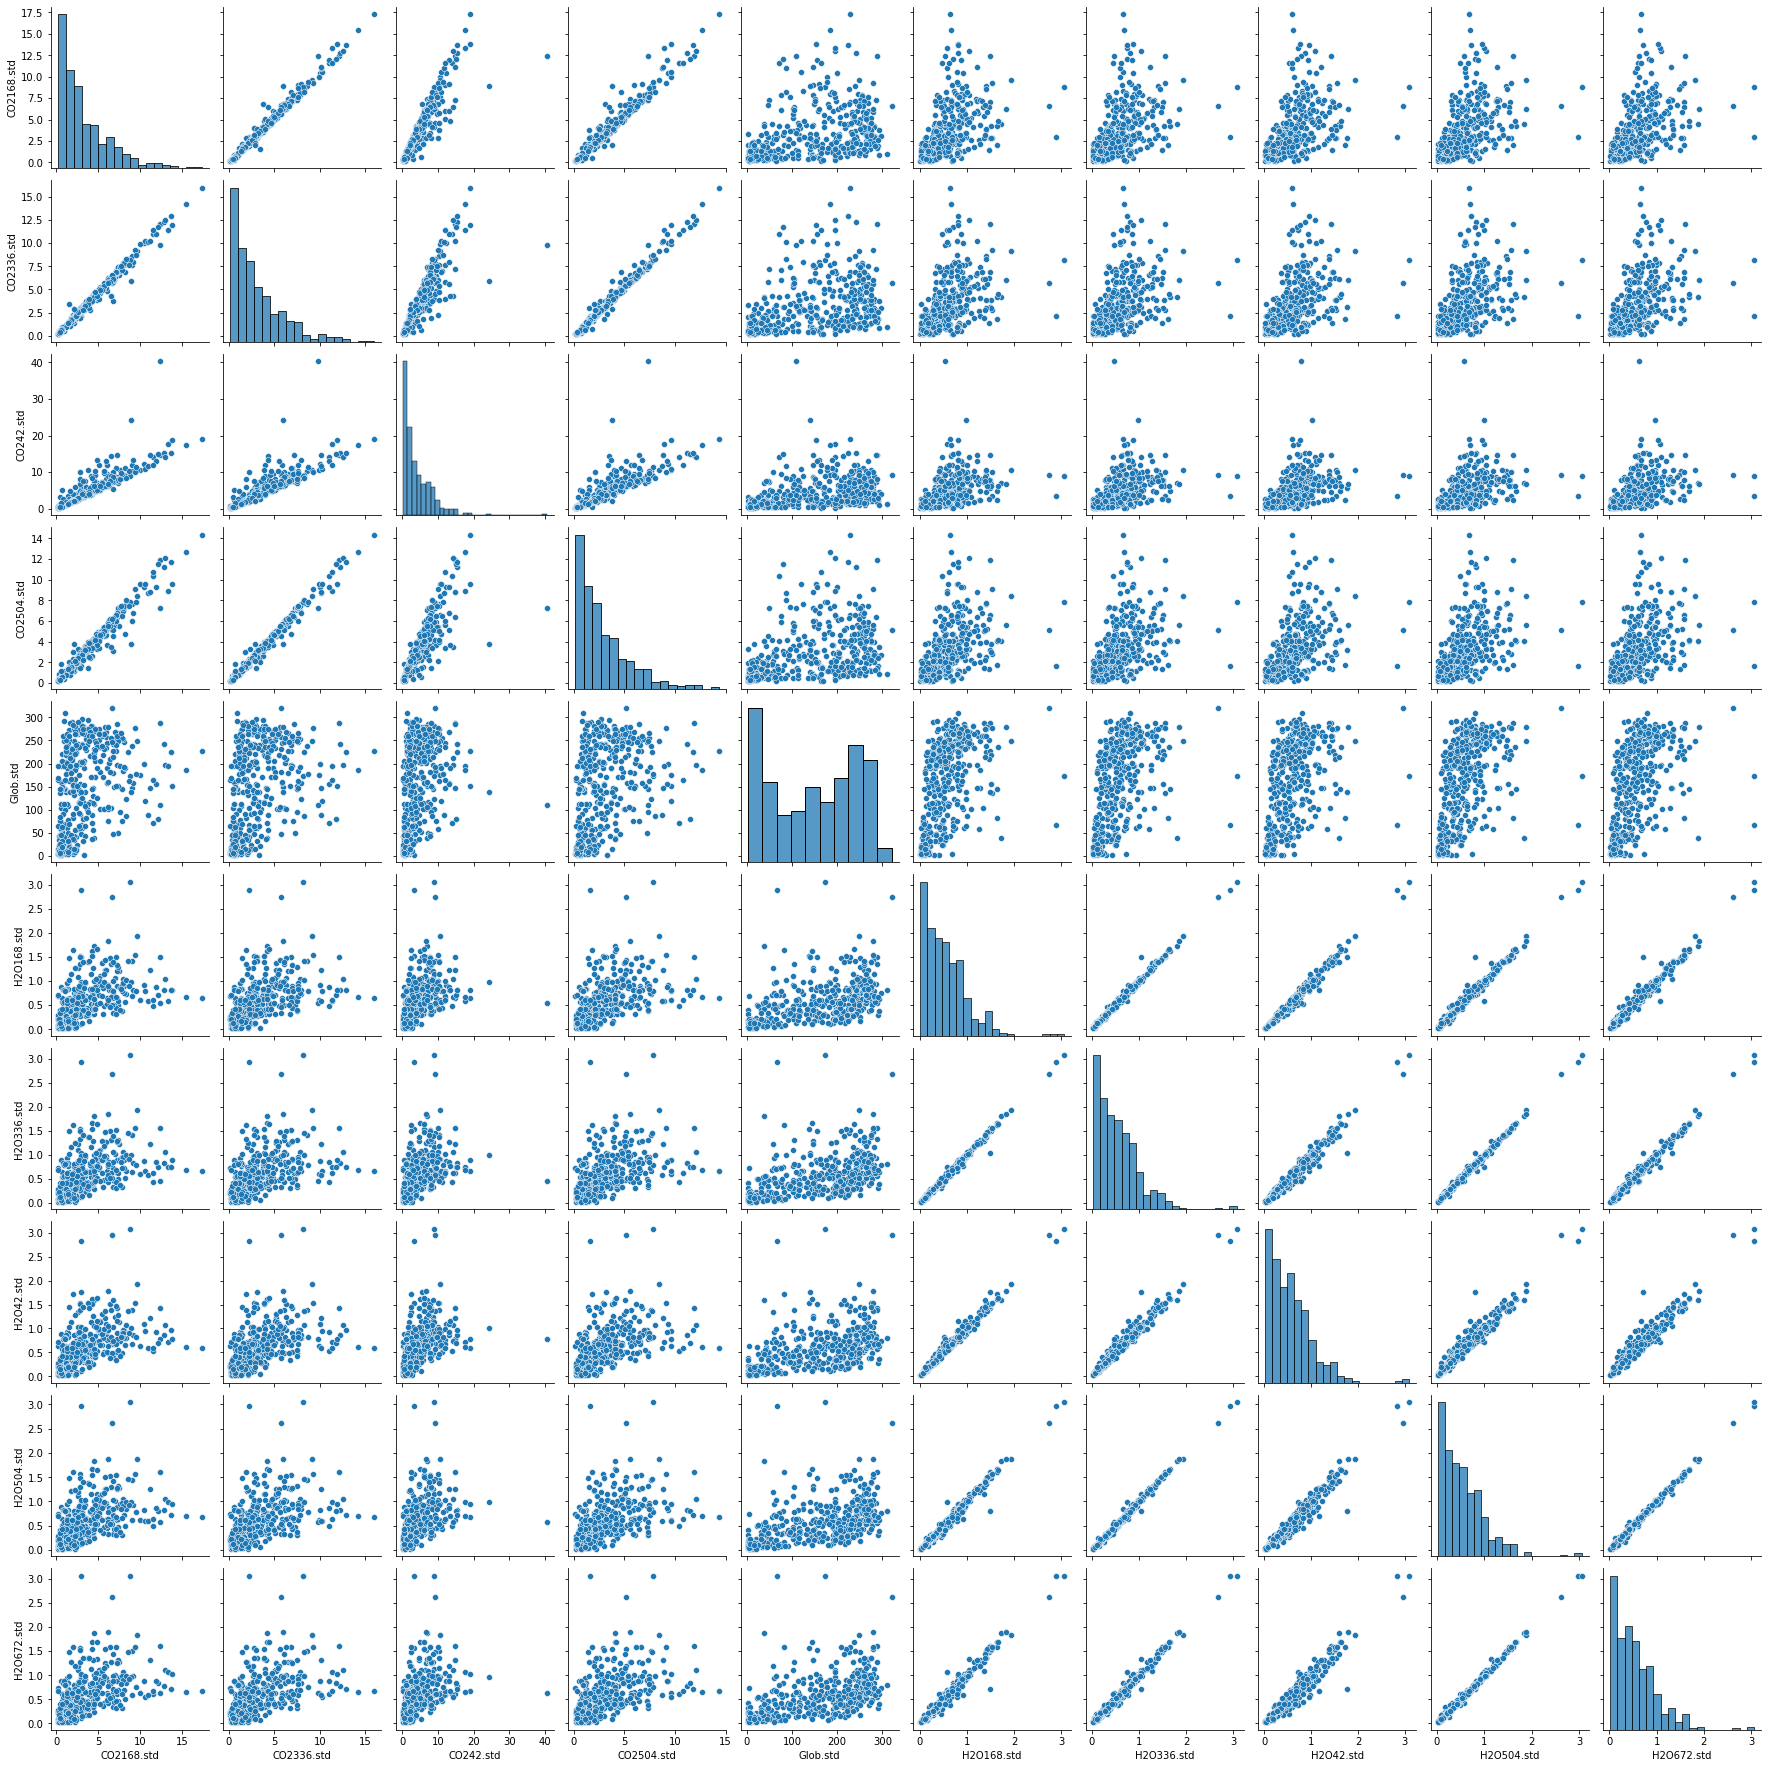

In [33]:
sns.pairplot(df_stds.loc[:, :'H2O672.std'])

## Correlation of mean columns

In [30]:
df_means = df.loc[:, df.columns[range(1, df.shape[1] - 1, 2)]]
df_means.corr()

,CO2168.mean,CO2336.mean,CO242.mean,CO2504.mean,Glob.mean,H2O168.mean,H2O336.mean,H2O42.mean,H2O504.mean,H2O672.mean,...,SO2168.mean,SWS.mean,T168.mean,T42.mean,T504.mean,T672.mean,T84.mean,UV_A.mean,UV_B.mean,CS.mean
CO2168.mean,1.000000,0.999534,0.990738,0.997810,-0.470361,-0.444091,-0.439809,-0.452034,-0.437152,-0.435265,...,0.314747,-0.236720,-0.581504,-0.581257,-0.582925,-0.582367,-0.581240,-0.486662,-0.487536,-0.120773
CO2336.mean,0.999534,1.000000,0.988514,0.999282,-0.465756,-0.445790,-0.441492,-0.453707,-0.438848,-0.436962,...,0.311935,-0.236541,-0.578631,-0.578247,-0.580686,-0.580293,-0.578258,-0.482059,-0.483683,-0.123735
CO242.mean,0.990738,0.988514,1.000000,0.984641,-0.464406,-0.388393,-0.384943,-0.395161,-0.382773,-0.381191,...,0.312836,-0.239506,-0.542886,-0.543447,-0.543098,-0.542110,-0.543175,-0.474628,-0.464142,-0.100798
CO2504.mean,0.997810,0.999282,0.984641,1.000000,-0.462897,-0.447584,-0.443268,-0.455497,-0.440647,-0.438765,...,0.307056,-0.236987,-0.575273,-0.574666,-0.578178,-0.578067,-0.574746,-0.478938,-0.481447,-0.127522
Glob.mean,-0.470361,-0.465756,-0.464406,-0.462897,1.000000,0.203444,0.198452,0.214051,0.195079,0.192660,...,-0.167081,0.316524,0.619584,0.617824,0.616645,0.616004,0.621218,0.986082,0.932337,0.127784
H2O168.mean,-0.444091,-0.445790,-0.388393,-0.447584,0.203444,1.000000,0.999878,0.999635,0.999646,0.999377,...,-0.300853,-0.128444,0.822964,0.823616,0.826834,0.827642,0.821964,0.298137,0.427487,0.463826
H2O336.mean,-0.439809,-0.441492,-0.384943,-0.443268,0.198452,0.999878,1.000000,0.999194,0.999929,0.999753,...,-0.299241,-0.129692,0.819926,0.820654,0.823774,0.824583,0.818961,0.292881,0.422128,0.465726
H2O42.mean,-0.452034,-0.453707,-0.395161,-0.455497,0.214051,0.999635,0.999194,1.000000,0.998761,0.998363,...,-0.303587,-0.125254,0.828560,0.829064,0.832454,0.833244,0.827502,0.308859,0.438290,0.460040
H2O504.mean,-0.437152,-0.438848,-0.382773,-0.440647,0.195079,0.999646,0.999929,0.998761,1.000000,0.999903,...,-0.297762,-0.130981,0.817489,0.818237,0.821370,0.822197,0.816527,0.289255,0.418386,0.467179
H2O672.mean,-0.435265,-0.436962,-0.381191,-0.438765,0.192660,0.999377,0.999753,0.998363,0.999903,1.000000,...,-0.296341,-0.137123,0.815487,0.816230,0.819378,0.820224,0.814516,0.286514,0.415489,0.467832


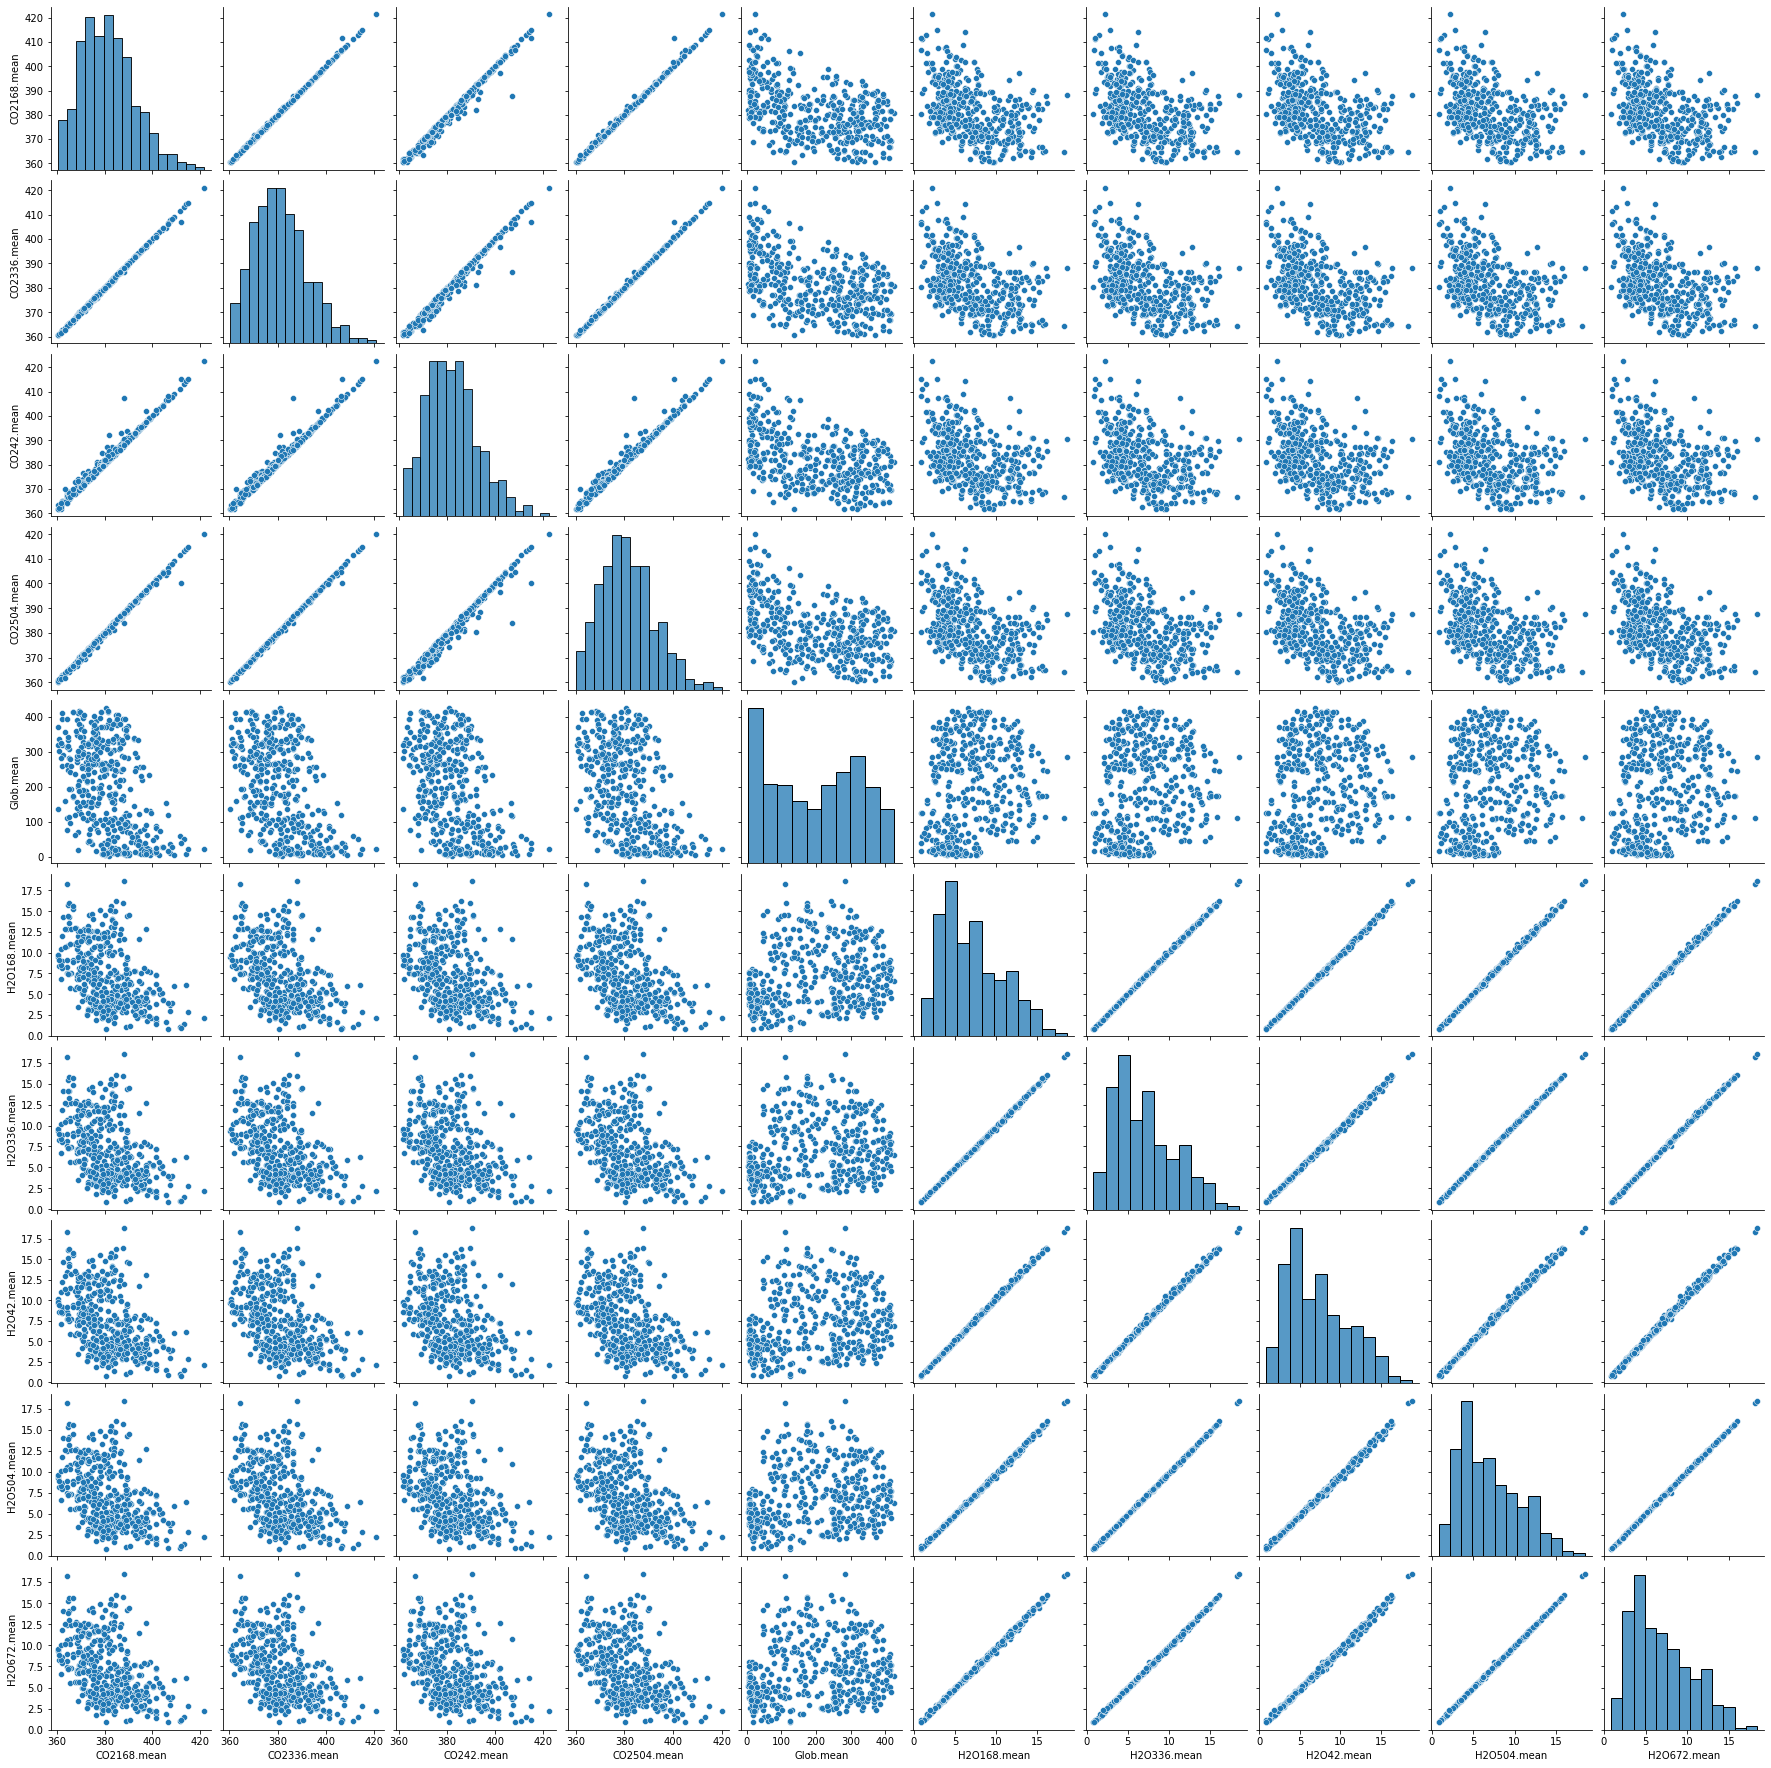

In [31]:
sns.pairplot(df_means.loc[:, :'H2O672.mean'])